# 情境

從內政部不動產交易時價登入資料中抓出台北,新北,台中,高雄這四個城市的檔案，進行分析，並找出符合以下條件的資料
1. 住宿用
2. 交易年月日，限制在110年第四季

In [1]:
import pandas as pd 

In [2]:
data_taipei = pd.read_csv("11004_taipei.csv")
data_newtaipei = pd.read_csv("11004_newtaipei.csv")
data_hsinchu = pd.read_csv("11004_hsinchu.csv")
data_taichung = pd.read_csv("11004_taichung.csv")
data_kaohsiung = pd.read_csv("11004_kaohsiung.csv")

C:\Users\sinon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 資料整理

In [3]:
#刪除[0]，它只是欄位的英文名稱
data_taipei = data_taipei.iloc[1:]
data_newtaipei = data_newtaipei.iloc[1:]
data_hsinchu = data_hsinchu.iloc[1:]
data_taichung = data_taichung.iloc[1:]
data_kaohsiung = data_kaohsiung.iloc[1:]

In [4]:
#因為要做彙整，所以做一個分類[city]，台北歸台北，新北歸新北...
data_taipei['city'] = "taipei"
data_newtaipei['city'] = "newtaipei"
data_hsinchu['city'] = "hsinchu "
data_taichung['city'] = "taichung"
data_kaohsiung['city'] = "kaohsiung"
all_data = pd.concat([data_taipei,data_newtaipei,data_hsinchu,data_taichung,data_kaohsiung],axis=0)

In [5]:
#先將欄位改成英文，方便之後程式撰寫與可讀性
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '土地位置建物門牌':'Land location building house number',
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}
analysis_data = all_data.rename(columns=columns_mapping)

In [6]:
#先挑出住家用，再將所有數字切換成數字型態(int,float)
analysis_data['use_zoning'].str.contains('住')
analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data['use_zoning'].str.contains('住')),analysis_columns].dropna()
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}
analysis_data = analysis_data.astype(columns_type)

In [7]:
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年

analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x)//10000)
analysis_data  = analysis_data.loc[(analysis_data.tx_dt_year >= 110)]
analysis_data = analysis_data.reset_index(drop=True)
analysis_data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,taipei,大安區,住家用,住,7000000,33.42,27.37,1101206,209455.0,4,2,2,110
1,taipei,士林區,住家用,住,4074350,52.74,44.09,1101103,77254.0,0,0,0,110
2,taipei,士林區,住家用,住,26500000,151.62,108.48,1101101,174779.0,1,3,1,110
3,taipei,文山區,住家用,住,13820400,92.30,78.12,1101108,149733.0,3,2,1,110
4,taipei,文山區,住家用,住,73000000,61.62,61.62,1101104,1184680.0,2,1,1,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22618,kaohsiung,仁武區,住家用,住,8620000,158.68,76.15,1100106,53514.0,3,2,2,110
22619,kaohsiung,三民區,住家用,住,9000000,112.78,60.11,1100116,79801.0,3,2,2,110
22620,kaohsiung,三民區,住家用,住,11500000,131.67,70.53,1100118,87340.0,3,2,2,110
22621,kaohsiung,苓雅區,住家用,住,17550000,233.36,119.83,1100116,74567.0,3,2,2,110


In [8]:
# 因為資料中面積的單位都是平方公尺，把它改成用坪數計算
# 1平方公尺相當於0.3025坪
analysis_data['building_area_square_feet'] = analysis_data['building_area_square_meter']*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data['main_building_area']*0.3025
analysis_data['unit_price_square_feet'] = analysis_data['unit_price']/0.3025
analysis_data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,taipei,大安區,住家用,住,7000000,33.42,27.37,1101206,209455.0,4,2,2,110,10.109550,8.279425,6.924132e+05
1,taipei,士林區,住家用,住,4074350,52.74,44.09,1101103,77254.0,0,0,0,110,15.953850,13.337225,2.553851e+05
2,taipei,士林區,住家用,住,26500000,151.62,108.48,1101101,174779.0,1,3,1,110,45.865050,32.815200,5.777818e+05
3,taipei,文山區,住家用,住,13820400,92.30,78.12,1101108,149733.0,3,2,1,110,27.920750,23.631300,4.949851e+05
4,taipei,文山區,住家用,住,73000000,61.62,61.62,1101104,1184680.0,2,1,1,110,18.640050,18.640050,3.916298e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22618,kaohsiung,仁武區,住家用,住,8620000,158.68,76.15,1100106,53514.0,3,2,2,110,48.000700,23.035375,1.769058e+05
22619,kaohsiung,三民區,住家用,住,9000000,112.78,60.11,1100116,79801.0,3,2,2,110,34.115950,18.183275,2.638050e+05
22620,kaohsiung,三民區,住家用,住,11500000,131.67,70.53,1100118,87340.0,3,2,2,110,39.830175,21.335325,2.887273e+05
22621,kaohsiung,苓雅區,住家用,住,17550000,233.36,119.83,1100116,74567.0,3,2,2,110,70.591400,36.248575,2.465025e+05


# 做資料最後的檢查

In [9]:
# 看看有沒有不合理的資料，像是價錢跟坪數為負的
analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.260800e+04,22608.000000,22608.000000,2.260800e+04,22608.000000,22608.000000,22608.000000,22608.0,22608.000000,22608.000000,2.260800e+04
mean,1.419476e+07,141.599178,91.650516,1.024242e+05,2.941392,1.785651,1.986111,110.0,42.833751,27.724281,3.385923e+05
std,1.614203e+07,79.284594,58.355588,6.270526e+04,1.370295,0.666723,1.323233,0.0,23.983590,17.652565,2.072901e+05
min,9.561900e+04,3.320000,3.330000,3.332000e+03,0.000000,0.000000,0.000000,110.0,1.004300,1.007325,1.101488e+04
25%,7.200000e+06,92.167500,58.495000,6.307500e+04,2.000000,2.000000,1.000000,110.0,27.880669,17.694737,2.085124e+05
50%,1.088000e+07,125.255000,78.055000,8.597100e+04,3.000000,2.000000,2.000000,110.0,37.889637,23.611638,2.842017e+05
75%,1.666000e+07,170.280000,102.515000,1.248722e+05,3.000000,2.000000,2.000000,110.0,51.509700,31.010788,4.128008e+05
max,7.166000e+08,1695.770000,1585.550000,1.697708e+06,36.000000,24.000000,36.000000,110.0,512.970425,479.628875,5.612258e+06


C:\Users\sinon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sinon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0, flags=flags)


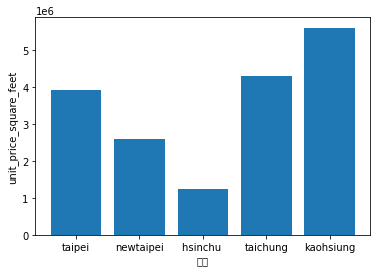

In [11]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
plt.bar(analysis_data['city'],analysis_data['unit_price_square_feet'])
plt.xlabel('城市')
plt.ylabel('unit_price_square_feet')
plt.show()